<h1 align='center'><b><font color ='pickle'>HW 6</b></h1>




# <Font color = 'pickle'>**Load Libraries/Install Software**

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
else:
  print('Not running on CoLab')

Running on CoLab


In [4]:
# Install wandb and update it to the latest version
if 'google.colab' in str(get_ipython()):
    !pip install wandb --upgrade -q

     |████████████████████████████████| 1.9 MB 3.9 MB/s 
     |████████████████████████████████| 166 kB 70.3 MB/s 
     |████████████████████████████████| 182 kB 76.9 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 166 kB 72.3 MB/s 
     |████████████████████████████████| 162 kB 73.6 MB/s 
     |████████████████████████████████| 162 kB 72.9 MB/s 
     |████████████████████████████████| 158 kB 75.9 MB/s 
     |████████████████████████████████| 157 kB 74.5 MB/s 
     |████████████████████████████████| 157 kB 75.4 MB/s 
     |████████████████████████████████| 157 kB 75.4 MB/s 
     |████████████████████████████████| 157 kB 74.2 MB/s 
     |████████████████████████████████| 157 kB 77.2 MB/s 
     |████████████████████████████████| 157 kB 76.6 MB/s 
     |████████████████████████████████| 157 kB 74.6 MB/s 
     |████████████████████████████████| 156 kB 69.4 MB/s 


In [5]:
# mount google drive
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importing the necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from pathlib import Path
import wandb
import spacy
import sys
from datetime import datetime

import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer

In [7]:
if 'google.colab' in str(get_ipython()):
  !python -m spacy download 'en_core_web_sm'

2022-11-09 21:37:31.240797: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
# Login to W&B
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [9]:
wandb.init(name="multilabel",project = "NLP")

wandb: Currently logged in as: teffygeorge. Use `wandb login --relogin` to force relogin


# <Font color = 'pickle'>**Specify Project Folders**

In [10]:
# This is the path where we will downlaod and save data
if 'google.colab' in str(get_ipython()):
  base_folder = Path('/content/drive/MyDrive/NLP/Homework6')
else:
  base_folder = Path('/content/drive/MyDrive/NLP/Homework6')

In [11]:
data_folder = base_folder/'datasets'
model_folder = base_folder/'models'
custom_functions = base_folder/'custom-functions'

In [12]:
sys.path.append(str(custom_functions))

In [13]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/NLP/Homework6/custom-functions']

In [14]:
#import custom_preprocessor as cp

# <Font color = 'pickle'>**Loading the Dataset**



In [15]:
# location of multi label file
data_file = data_folder /'df_multilabel_hw.joblib'

In [16]:
data_file

PosixPath('/content/drive/MyDrive/NLP/Homework6/datasets/df_multilabel_hw.joblib')

In [17]:
multilabel_data = joblib.load(data_file)

In [18]:
# location of multi label file
# data_file = data_folder /'multilabel_hw_cleaned.csv'

In [19]:
# creating Pandas Dataframe
# multilabel_data = pd.read_csv(data_file, index_col=0)

In [20]:
# print shape of the dataset
print(f'Shape of Multilabel data set is : {multilabel_data.shape}')

Shape of Multilabel data set is : (47427, 7)


In [21]:
multilabel_data.head()

,Unnamed: 0,Unnamed: 0.1,Id,Title,Body,Tags,Tag_Number
0,35264,3589944,3589945,ASP Query String From DropDown,<p>I have a webpage: <strong>Menu.aspx</strong...,c# asp.net,"[0, 9]"
1,56592,5756414,5756415,How can I run JavaScript code at server side J...,<p>I want to run JavaScript code at the server...,java javascript,"[1, 3]"
2,23303,2358596,2358597,linq to sql throwing an exception row not foun...,<p>Hi I am linq to sql and i am getting the er...,c# asp.net,"[0, 9]"
3,42563,4332881,4332882,Running a Python script on a PHP server,"<p>I am running a nginx web server, along with...",php python,"[2, 7]"
4,58216,5922132,5922133,some advice on how to write a window.resize fu...,<p>Im trying to write a function that resizes ...,javascript jquery,"[3, 5]"


In [22]:
# need to check if spacy needs to be added

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

multi_lb = MultiLabelBinarizer()
tag_df = pd.DataFrame(multi_lb.fit_transform(multilabel_data['Tag_Number']),columns=multi_lb.classes_)
tag_df = tag_df.drop(tag_df.columns[[0, 1, 12, 13]], axis=1) 
tag_df


,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
47422,0,1,0,0,1,0,0,0,0,0
47423,0,1,0,0,1,0,0,0,0,0
47424,0,1,0,0,1,0,0,0,0,0
47425,0,0,0,1,0,0,0,0,0,1


In [24]:
tag_df.reset_index(drop=True, inplace=True)

In [25]:
multilabel_data = multilabel_data.drop(['Unnamed: 0','Unnamed: 0.1','Id','Title','Tags','Tag_Number'], axis=1)
multilabel_data

,Body
0,<p>I have a webpage: <strong>Menu.aspx</strong...
1,<p>I want to run JavaScript code at the server...
2,<p>Hi I am linq to sql and i am getting the er...
3,"<p>I am running a nginx web server, along with..."
4,<p>Im trying to write a function that resizes ...
...,...
47422,<p>All-\nI am working on an app in which the u...
47423,<p>I nee to liste to phone state using phone s...
47424,<p>i am using threads to do few tasks. and aft...
47425,<p>I have html table with 1 row to fill in job...


In [26]:
multilabel_data.reset_index(drop=True, inplace=True)

In [27]:
multilabel_data = pd.concat([multilabel_data, tag_df], axis = 1)
multilabel_data

,Body,0,1,2,3,4,5,6,7,8,9
0,<p>I have a webpage: <strong>Menu.aspx</strong...,1,0,0,0,0,0,0,0,0,1
1,<p>I want to run JavaScript code at the server...,0,1,0,1,0,0,0,0,0,0
2,<p>Hi I am linq to sql and i am getting the er...,1,0,0,0,0,0,0,0,0,1
3,"<p>I am running a nginx web server, along with...",0,0,1,0,0,0,0,1,0,0
4,<p>Im trying to write a function that resizes ...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
47422,<p>All-\nI am working on an app in which the u...,0,1,0,0,1,0,0,0,0,0
47423,<p>I nee to liste to phone state using phone s...,0,1,0,0,1,0,0,0,0,0
47424,<p>i am using threads to do few tasks. and aft...,0,1,0,0,1,0,0,0,0,0
47425,<p>I have html table with 1 row to fill in job...,0,0,0,1,0,0,0,0,0,1


## <Font color = 'pickle'>**Create Train/Test/Valid Split**


In [28]:
X, y = multilabel_data['Body'], multilabel_data[['0',	'1',	'2',	'3',	'4',	'5',	'6',	'7',	'8',	'9']].values

# set aside 20% for test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state= 42) 

## <Font color = 'pickle'>**Data PreProcessing**

In [29]:
# X_train_cleaned_file = data_folder / 'x_train_cleaned_bag_of_words.pkl'
# X_valid_cleaned_file = data_folder / 'x_valid_cleaned_bag_of_words..pkl'
# X_test_cleaned_file = data_folder / 'x_test_cleaned_bag_of_words..pkl'

In [30]:
# joblib.dump(X_train_cleaned, X_train_cleaned_file)
# joblib.dump(X_valid_cleaned, X_valid_cleaned_file)
# joblib.dump(X_test_cleaned, X_test_cleaned_file)

In [31]:
X_train.dtype

dtype('O')

In [32]:
# Teffy - check
# X_train_cleaned = joblib.load(X_train)
# X_valid_cleaned = joblib.load(X_valid)
# X_test_cleaned = joblib.load(X_test)

In [33]:
from sklearn.feature_extraction.text import  TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", min_df=4, max_features=5000).fit(X_train)

X_train_vec = vectorizer.transform(X_train)
X_valid_vec = vectorizer.transform(X_valid)
X_test_vec = vectorizer.transform(X_test)

In [34]:
X_train_vec

<30352x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1239683 stored elements in Compressed Sparse Row format>

In [35]:
np.array(y_train)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
# Creating a tensors of data
X_train_tensor = torch.tensor(X_train_vec.toarray()).float()
X_valid_tensor = torch.tensor(X_valid_vec.toarray()).float()
X_test_tensor = torch.tensor(X_test_vec.toarray()).float()

y_train_tensor = torch.tensor(np.array(y_train)).float()
y_valid_tensor = torch.tensor(np.array(y_valid)).float()
y_test_tensor = torch.tensor(np.array(y_test)).float()

## <Font color = 'pickle'>**Create Tensor Dataset**

In [37]:
# Creating tensor dataset
train_set = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
valid_set = torch.utils.data.TensorDataset(X_valid_tensor, y_valid_tensor)
test_set = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

## <Font color = 'pickle'>**Check inputs**

In [38]:
# Shape of training data
train_set.tensors[0].shape

torch.Size([30352, 5000])

In [39]:
# shape of valid data
valid_set.tensors[0].shape

torch.Size([7589, 5000])

In [40]:
# Shape of testing data
test_set.tensors[0].shape

torch.Size([9486, 5000])

In [41]:
# Sahpe Target values
train_set.tensors[1].shape

torch.Size([30352, 10])

In [42]:
# Unique Target values
train_set.tensors[1].unique()

tensor([0., 1.])

# <font color = 'pickle'> **NN Training**

## <Font color = 'pickle'>**Model**

In [43]:
# Define custom model using nn.Module()
model = nn.Sequential( nn.Flatten(),
                nn.Linear(train_set.tensors[0].shape[1], 512),
                    nn.ReLU(),
                    nn.Linear(512, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10),
                    nn.Sigmoid())



def init_weights(m):
  if type(m) == nn.Linear:
      torch.nn.init.normal_(m.weight, mean = 0, std = 0.01)
      torch.nn.init.zeros_(m.bias)
        
# apply initialization recursively  to all modules
model.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=5000, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=10, bias=True)
  (6): Sigmoid()
)

## <Font color = 'pickle'>**Function for Training  Loops**

**Model Training** involves five steps: 

- Step 0: Randomly initialize parameters / weights
- Step 1: Compute model's predictions - forward pass
- Step 2: Compute loss
- Step 3: Compute the gradients
- Step 4: Update the parameters
- Step 5: Repeat steps 1 - 4

Model training is repeating this process over and over, for many **epochs**.

We will specify number of ***epochs*** and during each epoch we will iterate over the complete dataset and will keep on updating the parameters.

***Learning rate*** and ***epochs*** are known as hyperparameters. We have to adjust the values of these two based on validation dataset.

We will now create functions for step 1 to 4.

In [44]:
# def train(train_loader, learning_rate, loss_function, model, optimizer):
def train(train_loader, model, optimizer, loss_function, log_batch, log_interval, grad_clipping, max_norm):
  """ 
  Function for training the model in each epoch
  Input: iterator for train dataset, weights and bias, number of outputs, learning rate,
  loss function, model.
  Output: weights, bias, train loss, train accuracy at end of each epoch
  """

  # initilalize variables as global
  # these counts will be updated every epoch
  global batch_ct_train

  # Step 0: Randomly initialize parameters / weights - We give this as input to function for first epoch
  # In subsequent epochs the function gets the updated weights from last epoch

  # Training Loop 
  # Initialize train_loss at the he start of the epoch
  running_train_loss = 0
  running_train_correct = 0
  
  model.train()
  
  # Iterate on batches from the dataset using train_loader
  for input_, targets in train_loader:
    
    # move inputs and outputs to GPUs
    input_ = input_.to(device)
    targets = targets.to(device)


    # Step 1: Forward Pass: Compute model's predictions 
    output = model(input_)
    # Teffy - need to check
    #output = torch.sigmoid(output)
    
    # Step 2: Compute loss
    loss = loss_function(output, targets)
    
    # Correct prediction
    # y_pred = torch.argmax(output, dim = 0)
    # correct = torch.sum(y_pred == targets)
        
    batch_ct_train += 1

    # Step 3: Backward pass -Compute the gradients
    optimizer.zero_grad()
    loss.backward()

     # Gradient Clipping
    if grad_clipping:
      nn.utils.clip_grad_norm_(model.parameters(), max_norm=max_norm, norm_type=2)

    # Step 4: Update the parameters
    optimizer.step()
          
    # Add train loss of a batch 
    running_train_loss += loss.item()

    # Add Corect counts of a batch
    # running_train_correct += correct

    # log batch loss and accuracy
    if log_batch:
      if ((batch_ct_train + 1) % log_interval) == 0:
        wandb.log({f"Train Batch Loss  :": loss})
        # wandb.log({f"Train Batch Acc :": correct/len(targets)})
  
  # Calculate mean train loss for the whole dataset for a particular epoch
  train_loss = running_train_loss/len(train_loader)

  # Calculate accuracy for the whole dataset for a particular epoch
  # train_acc = running_train_correct/len(train_loader.dataset)
  

  return train_loss

## <Font color = 'pickle'>**Function for Validation Loops**


In [45]:
#def validate(valid_loader, loss_function, model):
def validate(valid_loader, model, optimizer, loss_function, log_batch, log_interval):

  """ 
  Function for calcuilating loss and prediction for validataion dataset. 
  Input: iterator for validation dataset, estimated weights and bias at the end of epoch in training loop, 
  learning rate,   loss function, model
  Output: val loss and accuracy for each epoch.
  """
  # initilalize variables as global
  # these counts will be updated every epoch
  global batch_ct_valid

  # Validation loop
  # Initialize valid_loss at the he strat of the epoch
  
  running_val_loss = 0
  running_val_correct = 0
  model.eval()
  with torch.no_grad():
    for input_,targets in valid_loader:

      # move inputs and outputs to GPUs
      input_ = input_.to(device)
      targets = targets.to(device)

      # Step 1: Forward Pass: Compute model's predictions 
      output = model(input_)
      # Teffy - need to check
      #output = torch.sigmoid(output)

      # Step 2: Compute loss
      loss = loss_function(output, targets)

      # Correct Predictions
      # y_pred = torch.argmax(output, dim = 0)
      # correct = torch.sum(y_pred == targets)

      batch_ct_valid += 1

      # Add val loss of a batch 
      running_val_loss += loss.item()

      # Add correct count for each batch
      # running_val_correct += correct

      # log batch loss and accuracy
      if log_batch:
        if ((batch_ct_valid + 1) % log_interval) == 0:
          wandb.log({f"Valid Batch Loss  :": loss})
          # wandb.log({f"Valid Batch Accuracy :": correct/len(targets)})

    # Calculate mean val loss for the whole dataset for a particular epoch
    val_loss = running_val_loss/len(valid_loader)

    # Calculate accuracy for the whole dataset for a particular epoch
    # val_acc = running_val_correct/len(valid_loader.dataset)
    
  return val_loss

## <Font color = 'pickle'>**Function for Model Training**
    
We will now create a function for step 5 of model training


In [46]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=5000, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=10, bias=True)
  (6): Sigmoid()
)

In [47]:
#def train_loop(train_loader, valid_loader, model, optimizer, loss_function, epochs, device):
def train_loop(train_loader, valid_loader, model,loss_function, optimizer, epochs, device, patience, early_stopping,
               file_model):
  """ 
  Function for training the model and plotting the graph for train & validation loss vs epoch.
  Input: iterator for train dataset, initial weights and bias, epochs, learning rate, batch size.
  Output: final weights, bias and train loss and validation loss for each epoch.
  """

  # Create lists to store train and val loss at each epoch
  train_loss_history = []
  valid_loss_history = []
  train_acc_history = []
  valid_acc_history = []

  # initialize variables for early stopping
  delta = 0
  best_score = None
  valid_loss_min = np.Inf
  counter_early_stop=0
  early_stop=False

  # Iterate for the given number of epochs
  # Step 5: Repeat steps 1 - 4

  for epoch in range(epochs):

    # Get train loss and accuracy for one epoch
    #train_loss, train_acc = train(train_loader, learning_rate, loss_function, model, optimizer)
    #valid_loss, valid_acc   = validate(valid_loader, loss_function, model)
    t0 = datetime.now()

    # Get train loss and accuracy for one epoch
    train_loss = train(train_loader, model, optimizer, loss_function, 
                                  wandb.config.LOG_BATCH, wandb.config.LOG_INTERVAL,
                                  wandb.config.GRAD_CLIPPING, wandb.config.MAX_NORM)
    valid_loss   = validate(valid_loader, model, optimizer, loss_function,
                                    wandb.config.LOG_BATCH, wandb.config.LOG_INTERVAL)

    dt = datetime.now() - t0

    # Save history of the Losses and accuracy
    train_loss_history.append(train_loss)
    # train_acc_history.append(train_acc)

    valid_loss_history.append(valid_loss)
    # valid_acc_history.append(valid_acc)

    # Log the train and valid loss to wandb
    wandb.log({f"Train Loss :": train_loss})
    # wandb.log({f"Train Acc :": train_acc})

    wandb.log({f"Valid Loss :": valid_loss})
    # wandb.log({f"Valid Acc :": valid_acc})

    if early_stopping:
      score = -valid_loss
      if best_score is None:
        best_score=score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving Model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

      elif score < best_score + delta:
        counter_early_stop += 1
        print(f'Early stoping counter: {counter_early_stop} out of {patience}')
        if counter_early_stop > patience:
          early_stop = True


      else:
        best_score = score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), file_model)
        counter_early_stop=0
        valid_loss_min = valid_loss

      if early_stop:
        print('Early Stopping')
        break

    else:

      score = -valid_loss
      if best_score is None:
        best_score=score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving Model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

      elif score < best_score + delta:
        print(f'Validation loss has not decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Not Saving Model...')
      
      else:
        best_score = score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

    # Print the train loss and accuracy for given number of epochs, batch size and number of samples
    print(f'Epoch : {epoch+1} / {epochs}')
    # print(f'Train Loss: {train_loss : .4f} | Train Accuracy: {train_acc * 100 : .4f}%')
    # print(f'Valid Loss: {valid_loss : .4f} | Valid Accuracy: {valid_acc * 100 : .4f}%')
    print()

  return train_loss_history, valid_loss_history

# <Font color = 'pickle'>**Hyperparameters**

In [48]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [49]:
#Hyperparameters
from types import SimpleNamespace
hyperparameters = SimpleNamespace(
    OUTPUT_DIM = 10,
    # HIDDEN_SIZES_LIST = [512]+[256], # 100 layers of size 200  [200]*100
    #DPROB_LIST = [0.5, 0.5],
    NON_LINEARITY= nn.ReLU(),
    #BATCH_NORM = True,
    EPOCHS = 20,
    DEVICE = device,
    BATCH_SIZE = 256,
    LEARNING_RATE = 0.8,
    DATASET="MULTILABEL",
    ARCHITECTUREe="MultiLabel",
    LOG_INTERVAL = 25,
    LOG_BATCH = True,
    FILE_MODEL = model_folder/'multilabel',
    GRAD_CLIPPING = False,
    MAX_NORM = 0,
    MOMENTUM = 0,
    PATIENCE = 5,
    EARLY_STOPPING = False,
    # SCHEDULER_FACTOR = 0,
    # SCHEDULER_PATIENCE = 0,
    WEIGHT_DECAY = 0
    )

In [50]:
# DATA LOADERS

In [51]:
# Initialize a new project
import random
wandb.init(name = 'Multi Label', project = 'NLP_MLP_multilabel', config = hyperparameters)

In [52]:
wandb.config = hyperparameters
wandb.config

namespace(ARCHITECTUREe='MultiLabel', BATCH_SIZE=256, DATASET='MULTILABEL', DEVICE=device(type='cpu'), EARLY_STOPPING=False, EPOCHS=20, FILE_MODEL=PosixPath('/content/drive/MyDrive/NLP/Homework6/models/multilabel'), GRAD_CLIPPING=False, LEARNING_RATE=0.8, LOG_BATCH=True, LOG_INTERVAL=25, MAX_NORM=0, MOMENTUM=0, NON_LINEARITY=ReLU(), OUTPUT_DIM=10, PATIENCE=5, WEIGHT_DECAY=0)

In [53]:
from keras import optimizers
# Fix seed value
SEED = 2345
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# Data Loader
#train_loader = torch.utils.data.DataLoader(train_set, batch_size=256, shuffle = True)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=wandb.config.BATCH_SIZE, shuffle = True)
                                         #  collate_fn=collate_batch, num_workers = 4)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=wandb.config.BATCH_SIZE, shuffle = False) 
                                          # collate_fn=collate_batch,  num_workers = 4)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=wandb.config.BATCH_SIZE,   shuffle = False) 
                                          #collate_fn=collate_batch,  num_workers = 4)

# cross entropy loss function
loss_function = nn.BCEWithLogitsLoss()

# use GPUs
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#wandb.config.DEVICE = device
#model.to(wandb.config.DEVICE)
#model_ = model_multilabel()
model.to(device)
#model.apply(init_weights)


# model 
#model_multiclass = MLPCustom(wandb.config.EMBED_DIM, 
#                       wandb.config.VOCAB_SIZE, 
#                       wandb.config.HIDDEN_SIZES_LIST, 
#                       wandb.config.DPROB_LIST,
#                       wandb.config.OUTPUT_DIM, 
#                       wandb.config.NON_LINEARITY,
#                       wandb.config.BATCH_NORM)

# model.to(wandb.config.device)

# Intialize stochiastic gradient descent optimizer
#optimizer = torch.optim.SGD(model.parameters(), 
#                             lr = wandb.config.LEARNING_RATE, 
#                             weight_decay=wandb.config.WEIGHT_DECAY)
optimizer = torch.optim.SGD(model.parameters(), lr = wandb.config.LEARNING_RATE)

wandb.config.OPTIMIZER = optimizer

# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor= wandb.config.scheduler_factor, 
#                              patience=wandb.config.scheduler_patience, verbose=True)

#scheduler = StepLR(optimizer, gamma=0.4,step_size=1, verbose=True)

# <Font color = 'pickle'>**Training Model**

In [54]:
# See live graphs in the notebook.
#%%wandb 
batch_ct_train, batch_ct_valid = 0, 0 
train_loss_history, valid_loss_history =train_loop(train_loader, valid_loader, model, loss_function, optimizer, 
                                                                                          wandb.config.EPOCHS, wandb.config.DEVICE,
                                                                                          wandb.config.PATIENCE, wandb.config.EARLY_STOPPING,
                                                                                          wandb.config.FILE_MODEL)

Validation loss has decreased (inf --> 0.762967). Saving Model...
Epoch : 1 / 20

Validation loss has decreased (0.762967 --> 0.700815). Saving model...
Epoch : 2 / 20

Validation loss has decreased (0.700815 --> 0.694221). Saving model...
Epoch : 3 / 20

Validation loss has decreased (0.694221 --> 0.693019). Saving model...
Epoch : 4 / 20

Validation loss has decreased (0.693019 --> 0.692609). Saving model...
Epoch : 5 / 20

Validation loss has decreased (0.692609 --> 0.692419). Saving model...
Epoch : 6 / 20

Validation loss has decreased (0.692419 --> 0.692300). Saving model...
Epoch : 7 / 20

Validation loss has decreased (0.692300 --> 0.692224). Saving model...
Epoch : 8 / 20

Validation loss has decreased (0.692224 --> 0.692169). Saving model...
Epoch : 9 / 20

Validation loss has decreased (0.692169 --> 0.692139). Saving model...
Epoch : 10 / 20

Validation loss has decreased (0.692139 --> 0.692118). Saving model...
Epoch : 11 / 20

Validation loss has decreased (0.692118 --> 0.

We can observe that with each epoch, our loss is getting reduced.

# <Font color = 'pickle'>**Get Accuracy, Predictions**


**METRICS USED**

*   Unlike multi-class, multi label classes are not mutually exclusive. We will use **multilabel_confusion_matrix** for the confusion matrix after we pass the expected and predicted labels, after binarizing, and get the first element from the list of each class

*   Aggregate metrics like macro, micro etc will give a better picture on how the model is performing.The **micro-average** of a metric is calculated by taking in TP, TN, FP and FN for each class, adding them up and then using those to compute the metric’s micro-average

*   **Hamming Loss** is a fraction of wrong labels to the total number of labels.It penalizes only the individual labels. The calculation is such that it does an exclusive or (XOR) between the actual and predicted labels and then average across the dataset.Lower this loss, better is the performance.





In [80]:
device

device(type='cpu')

In [76]:
def get_acc_pred(data_loader, model, device):
    
  """ 
  Function to get predictions and accuracy for a given data using estimated model
  Input: Data iterator, Final estimated weoights, bias
  Output: Prections and Accuracy for given dataset
  """

  # Array to store predicted labels
  predictions = torch.Tensor() # empty tensor
  predictions = predictions.to(device) # move predictions to GPU

  # Array to store actual labels
  y = torch.Tensor() # empty tensor
  y = y.to(device)

  # put the model in evaluation mode
  model.eval()
  
  # Iterate over batches from data iterator
  with torch.no_grad():
    for input_, targets, offsets in data_loader:
      
      # move inputs and outputs to GPUs
      
      input_ = input_.to(device)
      targets = targets.to(device)
      offsets = offsets.to(device)
      
      # Calculated the predicted labels
      output = model(input_, offsets)

      # Choose the label with maximum probability
      prediction = torch.argmax(output, dim = 0)

      # Add the predicted labels to the array
      predictions = torch.cat((predictions, prediction)) 

      # Add the actual labels to the array
      y = torch.cat((y, targets)) 

  # Check for complete dataset if actual and predicted labels are same or not
  # Calculate accuracy
  acc = (predictions == y).float().mean()

  # Return tuple containing predictions and accuracy
  return predictions, acc

In [56]:
 !pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 3.5 MB/s 


In [57]:
from skmultilearn.adapt import MLkNN

In [58]:
from sklearn.metrics import hamming_loss

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

In [60]:
multi_lb_predict = MultiLabelBinarizer()

classifier=make_pipeline(CountVectorizer(),
						TfidfTransformer(),
						OneVsRestClassifier(SGDClassifier())) 

In [61]:
random_state = np.random.RandomState(0)

In [68]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
# Binarize the output classes
Y = multi_lb_predict.fit_transform(y_train)
Y_test=multi_lb_predict.transform(y_test)

classifier.fit(X_train, Y)
y_score = classifier.fit(X_train, Y).decision_function(X_test)

predicted = classifier.predict(X_test)
all_labels = multi_lb_predict.inverse_transform(predicted)

#print accuracy_score
print ("accuracy : "+str(accuracy_score(Y_test, predicted)))

print ("micro f-measure "+str(f1_score(Y_test, predicted, average='micro')))

#for item, labels in zip(X_test, all_labels):
#    print ('%s => %s' % (item, ', '.join(labels)))


# Compute micro-average ROC curve and ROC area
precision_micro, recall_micro, _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision_micro = average_precision_score(Y_test, y_score,average="micro")

print ("precision : "+str(precision_micro)+",recall :"+str(recall_micro)+"average precision"+str(average_precision_micro))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label 1 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label 1 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


accuracy : 1.0
micro f-measure 1.0
precision : [1. 1.],recall :[1. 0.]average precision1.0


In [79]:
#relabel = MultiLabelBinarizer(["0", "1", "2", "3", "4","5","6","7","8","9"])  # 5 speces
hamming_loss(Y_test, y_score)

0.0

In [63]:
# Compute Precision-Recall and plot curve
n_classes = Y.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    print (Y_test[:,i])
    print (y_score[:,i])
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    print (precision[i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])
    print (average_precision[i])


[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1. 1.]
1.0
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1. 1.]
1.0


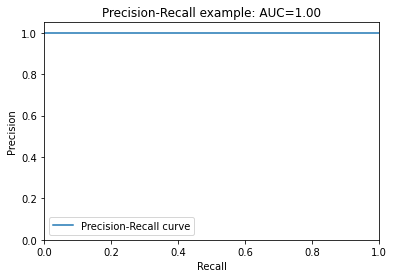

In [64]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

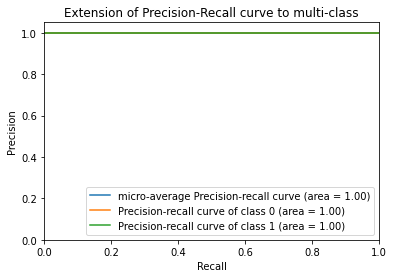

In [65]:

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall_micro, precision_micro,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision_micro))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

# <Font color = 'pickle'>**Confusion Matrix for Test Data**

In [69]:
from sklearn.metrics import multilabel_confusion_matrix

In [70]:
multilabel_confusion_matrix(Y_test,predicted)

array([[[   0,    0],
        [   0, 9486]],

       [[   0,    0],
        [   0, 9486]]])

In [ ]:
multilabel_confusion_matrix(Y_test,predicted)

array([[[   0,    0],
        [   0, 9486]],

       [[   0,    0],
        [   0, 9486]]])

In [73]:
wandb.finish()

Train Batch Loss :,█▆▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Train Loss :,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Valid Batch Loss :,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Valid Loss :,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Train Batch Loss :,0.69202
Train Loss :,0.6917
Valid Batch Loss :,0.69206
Valid Loss :,0.69189
